# Importing required Libraries

In [1]:
import pandas as pd
import numpy as np
import re # regular Expression
import matplotlib.pyplot as plt
import nltk 
from nltk.tokenize import sent_tokenize, word_tokenize

In [2]:
df = pd.read_csv("Assignment 1 data.txt", sep="\t")

# Dropping the Column 'Unnamed: 0 '

In [3]:
df.drop(columns='Unnamed: 0', inplace=True)
df.rename(columns={'0': 'tweet'}, inplace=True)

In [4]:
df.head()

,tweet
0,Stocks losses deepen as a key recession warnin...
1,RT @CallMeAhmjusAyn: The #economy.\r\n@FoxNews...
2,AP Explains: Is the US economy nearing a reces...
3,A @JobCreatorsUSA / https://t.co/JXEt7hQU4k su...
4,Who will stop mr. Mario Draghi and the ECB wit...


In [5]:
df.shape

(500, 1)

In [6]:
df.isnull().sum()

tweet    0
dtype: int64

In [7]:
df1 = df.copy()

In [8]:
df1.head()

,tweet
0,Stocks losses deepen as a key recession warnin...
1,RT @CallMeAhmjusAyn: The #economy.\r\n@FoxNews...
2,AP Explains: Is the US economy nearing a reces...
3,A @JobCreatorsUSA / https://t.co/JXEt7hQU4k su...
4,Who will stop mr. Mario Draghi and the ECB wit...


# Converting Tweet in to list

In [9]:
list(df1['tweet'])

['Stocks losses deepen as a key recession warning surfaces @GOP #economy #fail #collapse #recession #gop #greed… https://t.co/F8kazAixUk',
 "RT @CallMeAhmjusAyn: The #economy.\r\n@FoxNews @realDonaldTrump \r\n#Trump is an ejit.\r\n#maga #TrumpTrain2020 #sheeple are idiot's.\r\n#farming #Trad…",
 'AP Explains: Is the US economy nearing a recession? \r\n#Business\r\n#Economy\r\n#Recession\r\n#TradeWar\r\n#China\r\n#EU… https://t.co/0jtsR2kSxi',
 'A @JobCreatorsUSA / https://t.co/JXEt7hQU4k survey completed Tuesday, 56% rated the #economy as good or excellent,… https://t.co/j1XMiptADx',
 'Who will stop mr. Mario Draghi and the ECB with this counterproductive course of money dumping / zero interests? It… https://t.co/eweIrVuOK0',
 'Studying on Quizlet: The economy in Argentina\r\nhttps://t.co/H95pL722qj #economy #LearnEnglish #businessenglish',
 'RT @RKrivoFX: U.S. #Futures Rebound on #Trade Comments, #Earnings https://t.co/wXV3rzZ1yp #Currency #Trading #Forex #FX #Markets #Economy',
 'RT 

In [10]:
df1['tweet'] = list(df1['tweet'])

## Converting Text to lowercase

In [11]:
df.tweet.str.lower()

0      stocks losses deepen as a key recession warnin...
1      rt @callmeahmjusayn: the #economy.\r\n@foxnews...
2      ap explains: is the us economy nearing a reces...
3      a @jobcreatorsusa / https://t.co/jxet7hqu4k su...
4      who will stop mr. mario draghi and the ecb wit...
                             ...                        
495    rt @michaeljohns: .@realdonaldtrump has transf...
496    rt @emile1chedid: #lebanon #beirut #politics #...
497    rt @michaeljohns: .@realdonaldtrump has transf...
498    rt @farhadrahaei: rt.@heshmatalavi's #facts #t...
499    #primeminister @narendramodi commits to pumpin...
Name: tweet, Length: 500, dtype: object

In [12]:
df1['clean_text'] = df.tweet.str.lower()
df1.head()

,tweet,clean_text
0,Stocks losses deepen as a key recession warnin...,stocks losses deepen as a key recession warnin...
1,RT @CallMeAhmjusAyn: The #economy.\r\n@FoxNews...,rt @callmeahmjusayn: the #economy.\r\n@foxnews...
2,AP Explains: Is the US economy nearing a reces...,ap explains: is the us economy nearing a reces...
3,A @JobCreatorsUSA / https://t.co/JXEt7hQU4k su...,a @jobcreatorsusa / https://t.co/jxet7hqu4k su...
4,Who will stop mr. Mario Draghi and the ECB wit...,who will stop mr. mario draghi and the ecb wit...


# Removing user handles.

In [13]:
text = '@Rahim this course rocks!'

In [14]:
re.sub('@[^\s]+','',text)

' this course rocks!'

In [15]:
df1['clean_text']=df1.clean_text.apply(lambda x: re.sub('@[^\s]+','',x))
df1.head()

,tweet,clean_text
0,Stocks losses deepen as a key recession warnin...,stocks losses deepen as a key recession warnin...
1,RT @CallMeAhmjusAyn: The #economy.\r\n@FoxNews...,rt the #economy.\r\n \r\n#trump is an ejit.\...
2,AP Explains: Is the US economy nearing a reces...,ap explains: is the us economy nearing a reces...
3,A @JobCreatorsUSA / https://t.co/JXEt7hQU4k su...,a / https://t.co/jxet7hqu4k survey completed ...
4,Who will stop mr. Mario Draghi and the ECB wit...,who will stop mr. mario draghi and the ecb wit...


# Removing URL's

In [16]:
url_text = "@Rahim this course rocks! https://linkedin.com/in/rahim-baig"

In [17]:
re.sub('((https?:[^\s]+)|(www.[^\s]+))','',url_text)

'@Rahim this course rocks! '

In [18]:
df1['clean_text'] = df1['clean_text'].apply(lambda x:re.sub('((https?:[^\s]+)|(www.[^\s]+))','',x))
df1[df1["tweet"].str.contains("https")].head()                                         

,tweet,clean_text
0,Stocks losses deepen as a key recession warnin...,stocks losses deepen as a key recession warnin...
2,AP Explains: Is the US economy nearing a reces...,ap explains: is the us economy nearing a reces...
3,A @JobCreatorsUSA / https://t.co/JXEt7hQU4k su...,"a / survey completed tuesday, 56% rated the ..."
4,Who will stop mr. Mario Draghi and the ECB wit...,who will stop mr. mario draghi and the ecb wit...
5,Studying on Quizlet: The economy in Argentina\...,studying on quizlet: the economy in argentina\...


# extract only the hashtags from the tweets

In [19]:
hasht = '@Ram #food is #love'

In [20]:
re.findall(r"#(\w+)",hasht)

['food', 'love']

In [21]:
ht = [re.findall(r"#(\w+)",i) for i in df1.clean_text]

In [22]:
ht[0:5]

[['economy', 'fail', 'collapse', 'recession', 'gop', 'greed'],
 ['economy', 'trump', 'maga', 'trumptrain2020', 'sheeple', 'farming', 'trad'],
 ['business', 'economy', 'recession', 'tradewar', 'china', 'eu'],
 ['economy'],
 []]

# Counting the most common hashtags:

In [23]:
ht = sum(ht,[])
ht

['economy',
 'fail',
 'collapse',
 'recession',
 'gop',
 'greed',
 'economy',
 'trump',
 'maga',
 'trumptrain2020',
 'sheeple',
 'farming',
 'trad',
 'business',
 'economy',
 'recession',
 'tradewar',
 'china',
 'eu',
 'economy',
 'economy',
 'learnenglish',
 'businessenglish',
 'futures',
 'trade',
 'earnings',
 'currency',
 'trading',
 'forex',
 'fx',
 'markets',
 'economy',
 'economy',
 'trump',
 'economy',
 'trump',
 'maga',
 'trumptrain2020',
 'sheeple',
 'farming',
 'floods2019',
 'thursday',
 'conversationsdailynews',
 'news',
 'truthoftheday',
 'music',
 'singer',
 'invertedyieldcurve',
 'economy',
 '472',
 'economy',
 '134',
 'economy',
 '140',
 'economy',
 '785',
 'economy',
 'economy',
 'tollways',
 'travel',
 'china',
 'fintech',
 'company',
 'altcoins',
 'bitcoin',
 'china',
 'economy',
 'retweet',
 'poverty',
 'ows',
 'teaparty',
 'economy',
 'experience',
 'economy',
 'economy',
 'stocksdrop',
 'ekonomi',
 'economy',
 'sanayi',
 'üretim',
 'consumers',
 'generationz',
 '

In [24]:
ht.remove('economy')

In [25]:
ht

['fail',
 'collapse',
 'recession',
 'gop',
 'greed',
 'economy',
 'trump',
 'maga',
 'trumptrain2020',
 'sheeple',
 'farming',
 'trad',
 'business',
 'economy',
 'recession',
 'tradewar',
 'china',
 'eu',
 'economy',
 'economy',
 'learnenglish',
 'businessenglish',
 'futures',
 'trade',
 'earnings',
 'currency',
 'trading',
 'forex',
 'fx',
 'markets',
 'economy',
 'economy',
 'trump',
 'economy',
 'trump',
 'maga',
 'trumptrain2020',
 'sheeple',
 'farming',
 'floods2019',
 'thursday',
 'conversationsdailynews',
 'news',
 'truthoftheday',
 'music',
 'singer',
 'invertedyieldcurve',
 'economy',
 '472',
 'economy',
 '134',
 'economy',
 '140',
 'economy',
 '785',
 'economy',
 'economy',
 'tollways',
 'travel',
 'china',
 'fintech',
 'company',
 'altcoins',
 'bitcoin',
 'china',
 'economy',
 'retweet',
 'poverty',
 'ows',
 'teaparty',
 'economy',
 'experience',
 'economy',
 'economy',
 'stocksdrop',
 'ekonomi',
 'economy',
 'sanayi',
 'üretim',
 'consumers',
 'generationz',
 'inversion',


In [26]:
from collections import Counter

In [27]:
ht = Counter(ht)

In [28]:
ht

Counter({'fail': 1,
         'collapse': 1,
         'recession': 24,
         'gop': 1,
         'greed': 1,
         'economy': 245,
         'trump': 10,
         'maga': 3,
         'trumptrain2020': 2,
         'sheeple': 2,
         'farming': 2,
         'trad': 1,
         'business': 18,
         'tradewar': 6,
         'china': 12,
         'eu': 1,
         'learnenglish': 1,
         'businessenglish': 1,
         'futures': 2,
         'trade': 2,
         'earnings': 2,
         'currency': 2,
         'trading': 3,
         'forex': 2,
         'fx': 3,
         'markets': 9,
         'floods2019': 1,
         'thursday': 2,
         'conversationsdailynews': 1,
         'news': 5,
         'truthoftheday': 1,
         'music': 1,
         'singer': 1,
         'invertedyieldcurve': 1,
         '472': 1,
         '134': 1,
         '140': 1,
         '785': 1,
         'tollways': 1,
         'travel': 1,
         'fintech': 1,
         'company': 1,
         'altcoins':

In [29]:
Most_repeated = ht.most_common(11)
Most_repeated

[('economy', 245),
 ('recession', 24),
 ('india', 20),
 ('business', 18),
 ('hongkong', 17),
 ('bloomberg', 15),
 ('china', 12),
 ('trump', 10),
 ('markets', 9),
 ('economics', 9),
 ('infrastructure', 9)]

In [30]:
x, y = zip(*Most_repeated)

In [31]:
data = pd.DataFrame({'HashTags':x,'Count':y})
data

,HashTags,Count
0,economy,245
1,recession,24
2,india,20
3,business,18
4,hongkong,17
5,bloomberg,15
6,china,12
7,trump,10
8,markets,9
9,economics,9


In [32]:
data.drop(index=0, inplace=True)

In [33]:
data

,HashTags,Count
1,recession,24
2,india,20
3,business,18
4,hongkong,17
5,bloomberg,15
6,china,12
7,trump,10
8,markets,9
9,economics,9
10,infrastructure,9


# Top 10 hashtags in a horizontal bar chart.

<IPython.core.display.Javascript object>

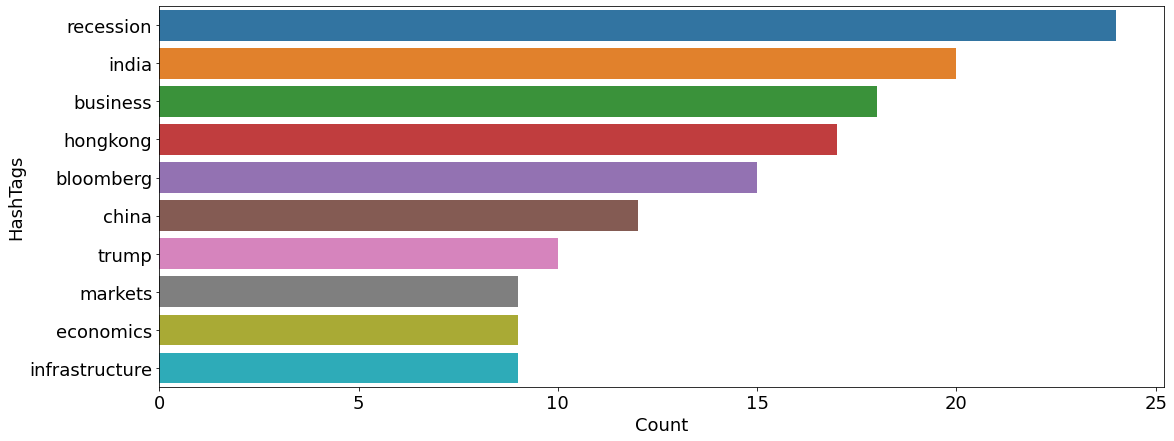

In [34]:
plt.figure(figsize=(18,7))
ax = sns.barplot(x='Count',y='HashTags',data=data)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
ax.set_ylabel('HashTags',fontsize=18)
ax.set_xlabel('Count',fontsize=18)
plt.show()

In [35]:
df1.head()

,tweet,clean_text
0,Stocks losses deepen as a key recession warnin...,stocks losses deepen as a key recession warnin...
1,RT @CallMeAhmjusAyn: The #economy.\r\n@FoxNews...,rt the #economy.\r\n \r\n#trump is an ejit.\...
2,AP Explains: Is the US economy nearing a reces...,ap explains: is the us economy nearing a reces...
3,A @JobCreatorsUSA / https://t.co/JXEt7hQU4k su...,"a / survey completed tuesday, 56% rated the ..."
4,Who will stop mr. Mario Draghi and the ECB wit...,who will stop mr. mario draghi and the ecb wit...


# Tokenzing the Words

In [36]:
Te = '@Ram #food is #love'

In [37]:
t1 = word_tokenize(Te)
t1

['@', 'Ram', '#', 'food', 'is', '#', 'love']

In [38]:
df1['clean_text'] = [word_tokenize(i) for i in df1.clean_text]

In [39]:
df1

,tweet,clean_text
0,Stocks losses deepen as a key recession warnin...,"[stocks, losses, deepen, as, a, key, recession..."
1,RT @CallMeAhmjusAyn: The #economy.\r\n@FoxNews...,"[rt, the, #, economy, ., #, trump, is, an, eji..."
2,AP Explains: Is the US economy nearing a reces...,"[ap, explains, :, is, the, us, economy, nearin..."
3,A @JobCreatorsUSA / https://t.co/JXEt7hQU4k su...,"[a, /, survey, completed, tuesday, ,, 56, %, r..."
4,Who will stop mr. Mario Draghi and the ECB wit...,"[who, will, stop, mr., mario, draghi, and, the..."
...,...,...
495,RT @michaeljohns: .@realDonaldTrump has transf...,"[rt, ., has, transformed, (, and, expanded, ),..."
496,RT @Emile1chedid: #Lebanon #Beirut #politics #...,"[rt, #, lebanon, #, beirut, #, politics, #, ec..."
497,RT @michaeljohns: .@realDonaldTrump has transf...,"[rt, ., has, transformed, (, and, expanded, ),..."
498,RT @farhadrahaei: RT.@HeshmatAlavi's #Facts #T...,"[rt, rt, ., #, facts, #, thread, 1, ), ., blam..."


# Removing the Punctuations

In [40]:
import string

In [41]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

# Different methods to remove punctuations

In [42]:
#new_string = a_string.replace('!', '')
#new_string = a_string.translate(str.maketrans('', '', string.punctuation))
#new_string = re.sub(r'[^\w\s]', '', a_string)
#for character in string.punctuation:
#    a_string = a_string.replace(character, '')

In [43]:
Te.translate(str.maketrans('', '', string.punctuation))

'Ram food is love'

In [46]:
regex = re.compile('[%s]' % re.escape(string.punctuation))
cleaned_text = []
for tweets in df1.clean_text:
    new_tweets = []
    for token in tweets:
        new_token = regex.sub(u'',token)
        if not new_token == u'':
            new_tweets.append(new_token)
            
    cleaned_text.append(new_tweets)
    
print(cleaned_text)    

[['stocks', 'losses', 'deepen', 'as', 'a', 'key', 'recession', 'warning', 'surfaces', 'economy', 'fail', 'collapse', 'recession', 'gop', 'greed…'], ['rt', 'the', 'economy', 'trump', 'is', 'an', 'ejit', 'maga', 'trumptrain2020', 'sheeple', 'are', 'idiot', 's', 'farming', 'trad…'], ['ap', 'explains', 'is', 'the', 'us', 'economy', 'nearing', 'a', 'recession', 'business', 'economy', 'recession', 'tradewar', 'china', 'eu…'], ['a', 'survey', 'completed', 'tuesday', '56', 'rated', 'the', 'economy', 'as', 'good', 'or', 'excellent', '…'], ['who', 'will', 'stop', 'mr', 'mario', 'draghi', 'and', 'the', 'ecb', 'with', 'this', 'counterproductive', 'course', 'of', 'money', 'dumping', 'zero', 'interests', 'it…'], ['studying', 'on', 'quizlet', 'the', 'economy', 'in', 'argentina', 'economy', 'learnenglish', 'businessenglish'], ['rt', 'us', 'futures', 'rebound', 'on', 'trade', 'comments', 'earnings', 'currency', 'trading', 'forex', 'fx', 'markets', 'economy'], ['rt', 'looking', 'forward', 'to', 'discuss

In [47]:
df1['clean_text'] = cleaned_text

In [48]:
df1

,tweet,clean_text
0,Stocks losses deepen as a key recession warnin...,"[stocks, losses, deepen, as, a, key, recession..."
1,RT @CallMeAhmjusAyn: The #economy.\r\n@FoxNews...,"[rt, the, economy, trump, is, an, ejit, maga, ..."
2,AP Explains: Is the US economy nearing a reces...,"[ap, explains, is, the, us, economy, nearing, ..."
3,A @JobCreatorsUSA / https://t.co/JXEt7hQU4k su...,"[a, survey, completed, tuesday, 56, rated, the..."
4,Who will stop mr. Mario Draghi and the ECB wit...,"[who, will, stop, mr, mario, draghi, and, the,..."
...,...,...
495,RT @michaeljohns: .@realDonaldTrump has transf...,"[rt, has, transformed, and, expanded, the, rep..."
496,RT @Emile1chedid: #Lebanon #Beirut #politics #...,"[rt, lebanon, beirut, politics, economy, comme..."
497,RT @michaeljohns: .@realDonaldTrump has transf...,"[rt, has, transformed, and, expanded, the, rep..."
498,RT @farhadrahaei: RT.@HeshmatAlavi's #Facts #T...,"[rt, rt, facts, thread, 1, blames, us, sanctio..."


In [49]:
from nltk.corpus import stopwords

In [56]:
print(stopwords)

<WordListCorpusReader in '/Users/mac/nltk_data/corpora/stopwords'>


In [57]:
def stop_words(text):
    text = [i.lower() for i in text if i not in stopwords.words('english')]
    return " ".join(text)

In [58]:
df1["clean_text"] = df1["clean_text"].apply(lambda x: stop_words(x))

In [61]:
df1['clean_text'].head()

0    stocks losses deepen key recession warning sur...
1    rt economy trump ejit maga trumptrain2020 shee...
2    ap explains us economy nearing recession busin...
3    survey completed tuesday 56 rated economy good...
4    stop mr mario draghi ecb counterproductive cou...
Name: clean_text, dtype: object

In [62]:
from english_words import english_words_lower_alpha_set

In [63]:
df1["clean_text"] = df1["clean_text"].apply(lambda x: " ".join(x for x in x.split() if x in english_words_lower_alpha_set))

In [66]:
df1["Updated count"] = df1["clean_text"].apply(len)

In [67]:
df1.head()

,tweet,clean_text,Updated count
0,Stocks losses deepen as a key recession warnin...,deepen key economy fail collapse gop,36
1,RT @CallMeAhmjusAyn: The #economy.\r\n@FoxNews...,economy trump idiot,19
2,AP Explains: Is the US economy nearing a reces...,us economy business economy china,33
3,A @JobCreatorsUSA / https://t.co/JXEt7hQU4k su...,survey tuesday economy good excellent,37
4,Who will stop mr. Mario Draghi and the ECB wit...,stop mr mario counterproductive course money zero,49


In [68]:
df1["clean_text"] = df1["clean_text"].astype("str")

In [70]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   tweet          500 non-null    object
 1   clean_text     500 non-null    object
 2   Updated count  500 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 11.8+ KB


In [71]:
from nltk.stem import WordNetLemmatizer
lem = WordNetLemmatizer()

In [72]:
def word_lem(text):
    textt = [lem.lemmatize(word) for word in text.split()]
    return " ".join(textt)

In [73]:
df1["clean_text"] = df1["clean_text"].apply(word_lem)

In [74]:
df1.head()

,tweet,clean_text,Updated count
0,Stocks losses deepen as a key recession warnin...,deepen key economy fail collapse gop,36
1,RT @CallMeAhmjusAyn: The #economy.\r\n@FoxNews...,economy trump idiot,19
2,AP Explains: Is the US economy nearing a reces...,u economy business economy china,33
3,A @JobCreatorsUSA / https://t.co/JXEt7hQU4k su...,survey tuesday economy good excellent,37
4,Who will stop mr. Mario Draghi and the ECB wit...,stop mr mario counterproductive course money zero,49


In [85]:
from sklearn.feature_extraction.text import CountVectorizer

In [94]:
cv = CountVectorizer(max_features=3000)
X = cv.fit_transform(df1['clean_text'])

In [95]:
X.shape

(500, 694)